## Modeling Section


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import random
import os
#load python packages

import datetime
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics

In [4]:
df = pd.read_csv('BigMartModelData.csv')
pd.options.display.max_columns = None

In [67]:
X_drop = df.drop([ 'Category_Name', 'Scheduled_Days_Ship','Customer_State','Delivery_Coded','Delivery_Status','Late_delivery_risk','Actual_Ship_Days','Customer_Zipcode','Order_City','Order_Country','Order_State','Order_Status'], axis = 1)
X_dev = pd.get_dummies(X_drop, columns = ['Shipping_Mode'])
# One-hot encode all features in training set.
#X = pd.get_dummies(X_dev)

X_dev

,Unnamed: 0,Category_Id,Order_Region_Caribbean,Order_Region_Central Africa,Order_Region_Central America,Order_Region_Central Asia,Order_Region_East Africa,Order_Region_East of USA,Order_Region_Eastern Asia,Order_Region_Eastern Europe,Order_Region_North Africa,Order_Region_Northern Europe,Order_Region_Oceania,Order_Region_South America,Order_Region_South Asia,Order_Region_South of USA,Order_Region_Southeast Asia,Order_Region_Southern Africa,Order_Region_Southern Europe,Order_Region_US Center,Order_Region_West Africa,Order_Region_West Asia,Order_Region_West of USA,Order_Region_Western Europe,Shipping_Mode_First Class,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class
0,0,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,3,73,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,73,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,13,73,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,15,73,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59486,180500,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
59487,180505,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
59488,180508,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59489,180512,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [70]:


# Split the data - setup the answer value (y_)
y = df['Delivery_Coded'].values.tolist()


X = X_dev.values.tolist()

features = ['Category_Name', 'Customer_State',
       'Customer_Zipcode', 'Order_City', 'Order_Country', 'Order_State',
       'Shipping_Mode', 'Order_Status','Delivery_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [7]:
class_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 1)

In [69]:
df['Delivery_Coded'] = df['Delivery_Coded'].replace([2],[1])
df['Delivery_Coded'][:10]

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Delivery_Coded, dtype: int64

In [82]:
class_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [83]:
X_dev.columns

Index(['Unnamed: 0', 'Category_Id', 'Order_Region_Caribbean',
       'Order_Region_Central Africa', 'Order_Region_Central America',
       'Order_Region_Central Asia', 'Order_Region_East Africa',
       'Order_Region_East of USA', 'Order_Region_Eastern Asia',
       'Order_Region_Eastern Europe', 'Order_Region_North Africa',
       'Order_Region_Northern Europe', 'Order_Region_Oceania',
       'Order_Region_South America', 'Order_Region_South Asia',
       'Order_Region_South of  USA ', 'Order_Region_Southeast Asia',
       'Order_Region_Southern Africa', 'Order_Region_Southern Europe',
       'Order_Region_US Center ', 'Order_Region_West Africa',
       'Order_Region_West Asia', 'Order_Region_West of USA ',
       'Order_Region_Western Europe', 'Shipping_Mode_First Class',
       'Shipping_Mode_Same Day', 'Shipping_Mode_Second Class',
       'Shipping_Mode_Standard Class'],
      dtype='object')

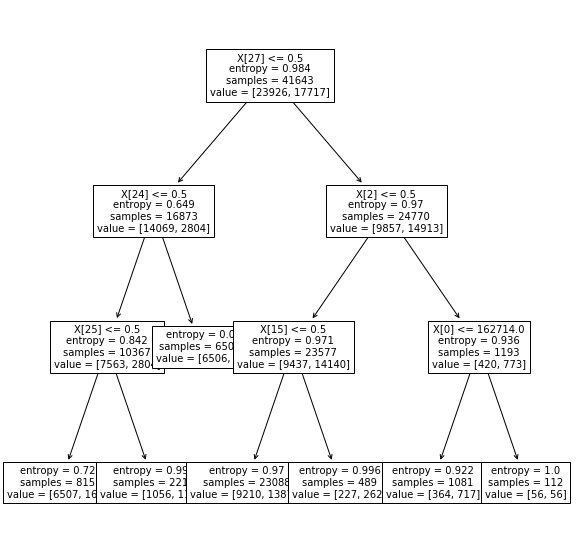

In [84]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(class_tree, fontsize=10)
plt.show()

In [85]:
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = class_tree.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

0        1
1        1
2        1
3        1
4        0
        ..
17843    1
17844    0
17845    0
17846    1
17847    0
Length: 17848, dtype: int32

In [86]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
#print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, average = 'macro'))
#print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, average = 'macro'))

Model Entropy - no max depth
Accuracy: 0.697333034513671
Balanced accuracy: 0.7241976291467362
Precision score for "Yes" 0.7388366136498177
Recall score for "Yes" 0.7241976291467362


## RandomForest Setup

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [88]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(random_state = 1234, max_depth = 3)

# Model and fit
firstRFModel.fit(X_train, y_train)

y_pred = firstRFModel.predict(X_test)

pd.Series(y_pred)

0        1
1        1
2        1
3        1
4        0
        ..
17843    1
17844    0
17845    0
17846    1
17847    0
Length: 17848, dtype: int32

In [90]:
print("Random Forest  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, average = 'weighted', pos_label = "Yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred, average = 'weighted', pos_label = "No"))

Random Forest  model - max depth 3
Accuracy: 0.6951479157328552
Balanced accuracy: 0.7141865166756138
Precision score 0.7344484072740433
Recall score 0.6951479157328552


Feature Importance Plot

In [91]:

names = []
importances = []
for name, importance in zip(X_dev.columns, firstRFModel.feature_importances_):
    print(name, '=', importance)
    names.append(name)
    importances.append(importance)
  

Unnamed: 0 = 0.0961186164309657
Category_Id = 0.00459302192773432
Order_Region_Caribbean = 0.0031740352902221523
Order_Region_Central Africa = 3.059235875510269e-05
Order_Region_Central America = 0.0009829167336069195
Order_Region_Central Asia = 3.85292732935405e-05
Order_Region_East Africa = 1.923918487878849e-06
Order_Region_East of USA = 0.00372069923404384
Order_Region_Eastern Asia = 2.429113171400738e-05
Order_Region_Eastern Europe = 0.0001198719515715665
Order_Region_North Africa = 0.00016415835704134551
Order_Region_Northern Europe = 5.6406269974769653e-05
Order_Region_Oceania = 9.330200908904826e-05
Order_Region_South America = 0.000662747197182706
Order_Region_South Asia = 0.0008158025553986727
Order_Region_South of  USA  = 0.001840733190690671
Order_Region_Southeast Asia = 6.836139403828898e-05
Order_Region_Southern Africa = 3.3875294634722277e-05
Order_Region_Southern Europe = 0.0008991082884194921
Order_Region_US Center  = 0.0001237728028482623
Order_Region_West Africa = 0.

<BarContainer object of 28 artists>

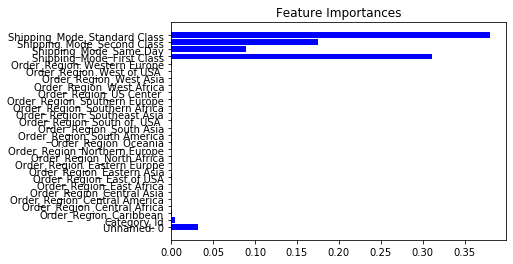

In [51]:
plt.title('Feature Importances')
plt.barh(names, importances, color = 'b', align = 'center')


In [42]:
names


['Unnamed: 0',
 'Actual_Ship_Days',
 'Scheduled_Days_Ship',
 'Late_delivery_risk',
 'Category_Id',
 'Order_Region_Caribbean',
 'Order_Region_Central Africa',
 'Order_Region_Central America',
 'Order_Region_Central Asia',
 'Order_Region_East Africa',
 'Order_Region_East of USA',
 'Order_Region_Eastern Asia',
 'Order_Region_Eastern Europe',
 'Order_Region_North Africa',
 'Order_Region_Northern Europe',
 'Order_Region_Oceania',
 'Order_Region_South America',
 'Order_Region_South Asia',
 'Order_Region_South of  USA ',
 'Order_Region_Southeast Asia',
 'Order_Region_Southern Africa',
 'Order_Region_Southern Europe',
 'Order_Region_US Center ',
 'Order_Region_West Africa',
 'Order_Region_West Asia',
 'Order_Region_West of USA ',
 'Order_Region_Western Europe',
 'Delivery_Status_Advance shipping',
 'Delivery_Status_Late delivery',
 'Delivery_Status_Shipping on time',
 'Shipping_Mode_First Class',
 'Shipping_Mode_Same Day',
 'Shipping_Mode_Second Class',
 'Shipping_Mode_Standard Class']

## Appears the Order Regions are irrelevant features for this show.


In [92]:
X_dev = X_dev.drop([ 'Order_Region_Caribbean',
 'Order_Region_Central Africa',
 'Order_Region_Central America',
 'Order_Region_Central Asia',
 'Order_Region_East Africa',
 'Order_Region_East of USA',
 'Order_Region_Eastern Asia',
 'Order_Region_Eastern Europe',
 'Order_Region_North Africa',
 'Order_Region_Northern Europe',
 'Order_Region_Oceania',
 'Order_Region_South America',
 'Order_Region_South Asia',
 'Order_Region_South of  USA ',
 'Order_Region_Southeast Asia',
 'Order_Region_Southern Africa',
 'Order_Region_Southern Europe',
 'Order_Region_US Center ',
 'Order_Region_West Africa',
 'Order_Region_West Asia',
 'Order_Region_West of USA ',
 'Order_Region_Western Europe'], axis = 1)

## Let's do this again - split and train

In [93]:
# Split the data
y = df['Delivery_Coded'].values.tolist()


X = X_dev.values.tolist()

features = ['Category_Name', 'Customer_State',
       'Customer_Zipcode', 'Order_City', 'Order_Country', 'Order_State',
       'Shipping_Mode', 'Order_Status','Delivery_Coded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



## Decision Tree

In [94]:
class_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

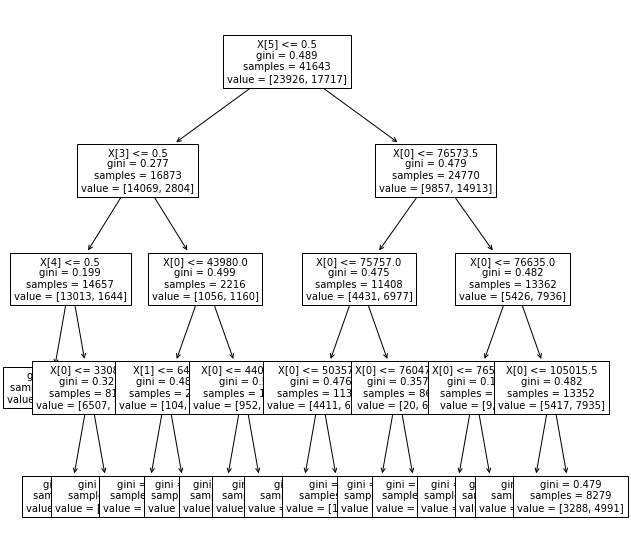

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(class_tree, fontsize=10)
plt.show()

In [96]:
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = class_tree.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

0        1
1        1
2        1
3        1
4        0
        ..
17843    1
17844    0
17845    0
17846    1
17847    0
Length: 17848, dtype: int32

In [97]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
#print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, average = 'macro'))
#print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, average = 'macro'))

Model Entropy - no max depth
Accuracy: 0.6979493500672345
Balanced accuracy: 0.7250450490391198
Precision score for "Yes" 0.7401634014319828
Recall score for "Yes" 0.7250450490391198


## RandomForest Repeat

In [98]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(random_state = 1234, max_depth = 3)

# Model and fit
firstRFModel.fit(X_train, y_train)

y_pred = firstRFModel.predict(X_test)

pd.Series(y_pred)

0        1
1        1
2        1
3        1
4        0
        ..
17843    1
17844    0
17845    0
17846    1
17847    0
Length: 17848, dtype: int32

Random Forest  model - max depth 3
Accuracy: 0.6952039444195428
Balanced accuracy: 0.714252523276274
Precision score 0.7345305115284538
Recall score 0.6952039444195428


O:\Users\Joe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
O:\Users\Joe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'No') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


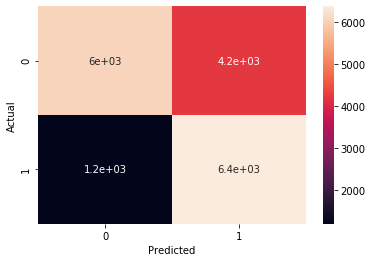

In [99]:
print("Random Forest  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, average = 'weighted', pos_label = "Yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred, average = 'weighted', pos_label = "No"))
confusion_matrix = pd.crosstab(np.array(y_test), np.array( y_pred), rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lreg = LogisticRegression(max_iter = 10000)
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

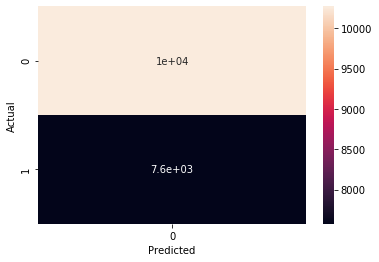

In [102]:
confusion_matrix = pd.crosstab(np.array(y_test), np.array( y_pred), rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [103]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
#print('Precision: ' , metrics.precision_score(y_test,y_pred, average = 'macro'))
#print('Recall: ' , metrics.recall_score(y_test,y_pred, average = 'macro'))
plt.show()

Accuracy:  0.5755826983415508


In [104]:
## Check Feature Importance again.
names = []
importances = []
for name, importance in zip(X_dev.columns, firstRFModel.feature_importances_):
    print(name, '=', importance)
    names.append(name)
    importances.append(importance)

Unnamed: 0 = 0.021345531758906414
Category_Id = 0.00134560122947917
Shipping_Mode_First Class = 0.3810781036270907
Shipping_Mode_Same Day = 0.03418354838676454
Shipping_Mode_Second Class = 0.12418496156030752
Shipping_Mode_Standard Class = 0.4378622534374516
